In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Dense, Input, GlobalMaxPool1D
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('./dataset/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# v1 -> labels, v2 -> data
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
Y = df['b_labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size=0.33)

In [9]:
print(f"X_train.shape: {X_train.shape}, X_test.shape: {X_test.shape}, Y_train.shape: {Y_train.shape}. Y_test.shape: {Y_test.shape}")

X_train.shape: (3733,), X_test.shape: (1839,), Y_train.shape: (3733,). Y_test.shape: (1839,)


In [10]:
MAX_VOCAB_SIZE = 20000

In [11]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)

In [12]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
# print(sequences_train)

In [13]:
word2vec = tokenizer.word_index
V = len(word2vec)
print('Unique tokens: ', V)

Unique tokens:  7107


In [14]:
# N x T 
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 189)

In [15]:
T = data_train.shape[1]
T

189

In [16]:
data_test = pad_sequences(sequences_test, maxlen=T)
data_test.shape

(1839, 189)

### Generate a model

In [17]:
D = 20 
M = 15

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding (Embedding)       (None, 189, 20)           142160    
                                                                 
 lstm (LSTM)                 (None, 189, 15)           2160      
                                                                 
 global_max_pooling1d (Globa  (None, 15)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 144,336
Trainable params: 144,336
Non-trainable params: 0
_______________________________________________________

2022-03-23 10:36:01.080613: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
r = model.fit(data_train, Y_train, epochs=10, validation_data=(data_test, Y_test))

Epoch 1/10
117/117 [==============================] - 6s 40ms/step - loss: 0.4634 - accuracy: 0.8596 - val_loss: 0.3585 - val_accuracy: 0.8564
Epoch 2/10
117/117 [==============================] - 4s 37ms/step - loss: 0.2699 - accuracy: 0.8706 - val_loss: 0.2541 - val_accuracy: 0.8564
Epoch 3/10
117/117 [==============================] - 4s 37ms/step - loss: 0.2116 - accuracy: 0.8706 - val_loss: 0.2166 - val_accuracy: 0.8564
Epoch 4/10
117/117 [==============================] - 4s 37ms/step - loss: 0.1678 - accuracy: 0.9089 - val_loss: 0.1727 - val_accuracy: 0.9690
Epoch 5/10
117/117 [==============================] - 4s 38ms/step - loss: 0.1205 - accuracy: 0.9946 - val_loss: 0.1335 - val_accuracy: 0.9788
Epoch 6/10
117/117 [==============================] - 4s 37ms/step - loss: 0.0884 - accuracy: 0.9968 - val_loss: 0.1124 - val_accuracy: 0.9821
Epoch 7/10
117/117 [==============================] - 4s 37ms/step - loss: 0.0693 - accuracy: 0.9976 - val_loss: 0.0974 - val_accuracy: 0.9831

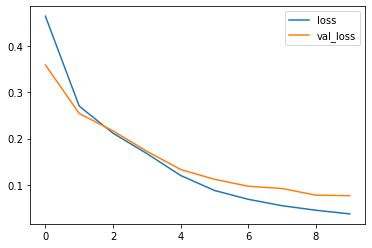

In [19]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

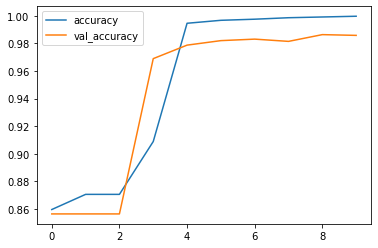

In [20]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [70]:
spam_email = '''As kids, we all learned by doing. We just called it playing. 
               And playing is how kids learn everything from complex social interactions to coding to 
               dinosaur names. Knowing your stegosaurus from your qianzhousaurus may not be all that 
               important as an adult, but we all still have that inner 10-year-old that loves to learn by playing. 
               Our Cloud Playground gives you the freedom to build, test, fail, and learn in completely real, 
               completely risk-free AWS, Azure, and GCP sandbox environments.'''

In [81]:
ham_email = '''It's been a while since we last spoke or saw one another, with all the time that has passed, I think it has been around (6) years now if my memory serves me correctly? I was going through some old things I had in storage and came across our old school yearbook (or write a similar reason that you thought of this old friend). I was flipping through the pages when I came across your photo (and a photo of us together). My little trip down memory lane made me wonder what you have been up to all these years, where are you living now and what has life brought to you after all this time? Are you married? Any children? I am now living in (Paris) with my (husband/boyfriend/wife etc.) (name) and we have been (dating/married) for (2) years now. I met (him/her) in (London) and (he/she) was working in (Paris) at the time. Things went from there and now we are happy, enjoying life and all its wonderful new beginnings together. On the work front, I am (use this area to talk a little about your current work, what you do etc.). What about you? Tell me a little about what you are doing! I have (enclosed/attached) some current photos of me and (name of partner), if you have any recent photos I would love to see them! I hope to hear back from you, really looking forward to learning all about what you have been up to and where you have been all this time! All the best,'''

In [83]:
sample_email_sequences = tokenizer.texts_to_sequences([ham_email]) 

In [84]:
sample_email_padding = pad_sequences(sample_email_sequences)

In [85]:
score = float(model.predict(sample_email_padding))
if score > 0.5:
    print("{:.2f} 확률로 Ham 메일입니다.".format(score * 100))
else:
    print("{:.2f} 확률로 Spam 메일입니다.".format((1 - score) * 100))

64.98 확률로 Ham 메일입니다.
